In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

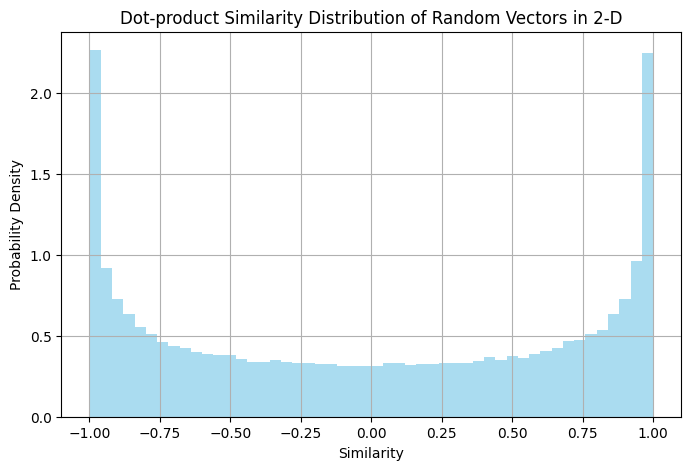

In [ ]:
# Import necessary libraries


# Parameters
d = 2               # Dimensionality of the vectors
n_sample = 100000   # Number of Monte Carlo samples

# Function to generate a random normalized vector
def random_unit_vector(dim):
    vec = np.random.randn(dim)       # Draw from standard normal
    vec /= np.linalg.norm(vec)       # Normalize to unit length
    return vec

# Monte Carlo simulation: calculate dot products
dot_products = []
for _ in range(n_sample):
    v1 = random_unit_vector(d)
    v2 = random_unit_vector(d)
    dot = np.dot(v1, v2)
    dot_products.append(dot)

c = np.array(dot_products)

# Plot the distribution
plt.figure(figsize=(8,5))
plt.hist(dot_products, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title(f'Dot-product Similarity Distribution of Random Vectors in {d}-D')
plt.xlabel('Similarity')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


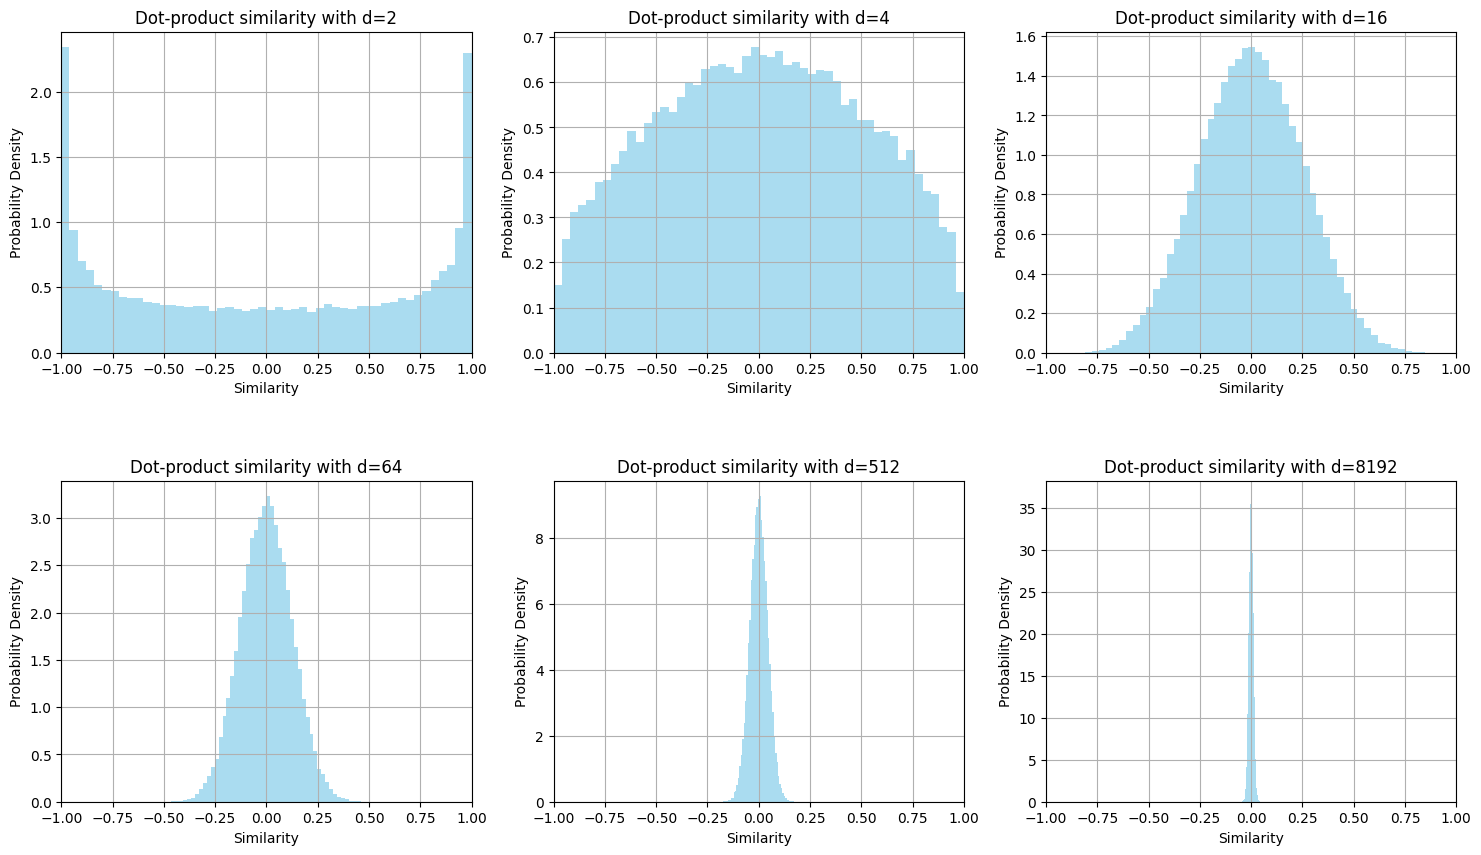

In [64]:
# Parameters
dimensions = [2, 4, 16, 64, 512, 8192]  # List of dimensions
n_sample = 50000                  # Number of Monte Carlo samples

# Function to generate a random normalized vector
def random_unit_vector(dim):
    vec = np.random.uniform(-1,1,dim)
    vec /= np.linalg.norm(vec)
    return vec

# Prepare a 2x3 plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to easily index axes

# Loop over dimensions
for idx, d in enumerate(dimensions):
    dot_products = []
    
    for _ in range(n_sample):
        v1 = random_unit_vector(d)
        v2 = random_unit_vector(d)
        dot = np.dot(v1, v2)
        dot_products.append(dot)
    
    dot_products = np.array(dot_products)
    
    # Plot histogram
    axes[idx].hist(dot_products, bins=50, density=True, alpha=0.7, color='skyblue')
    axes[idx].set_title(f'Dot-product similarity with d={d}')
    axes[idx].set_xlabel('Similarity')
    axes[idx].set_ylabel('Probability Density')
    axes[idx].set_xlim(-1,1)
    axes[idx].grid(True)

plt.subplots_adjust(hspace=0.4)
plt.show()


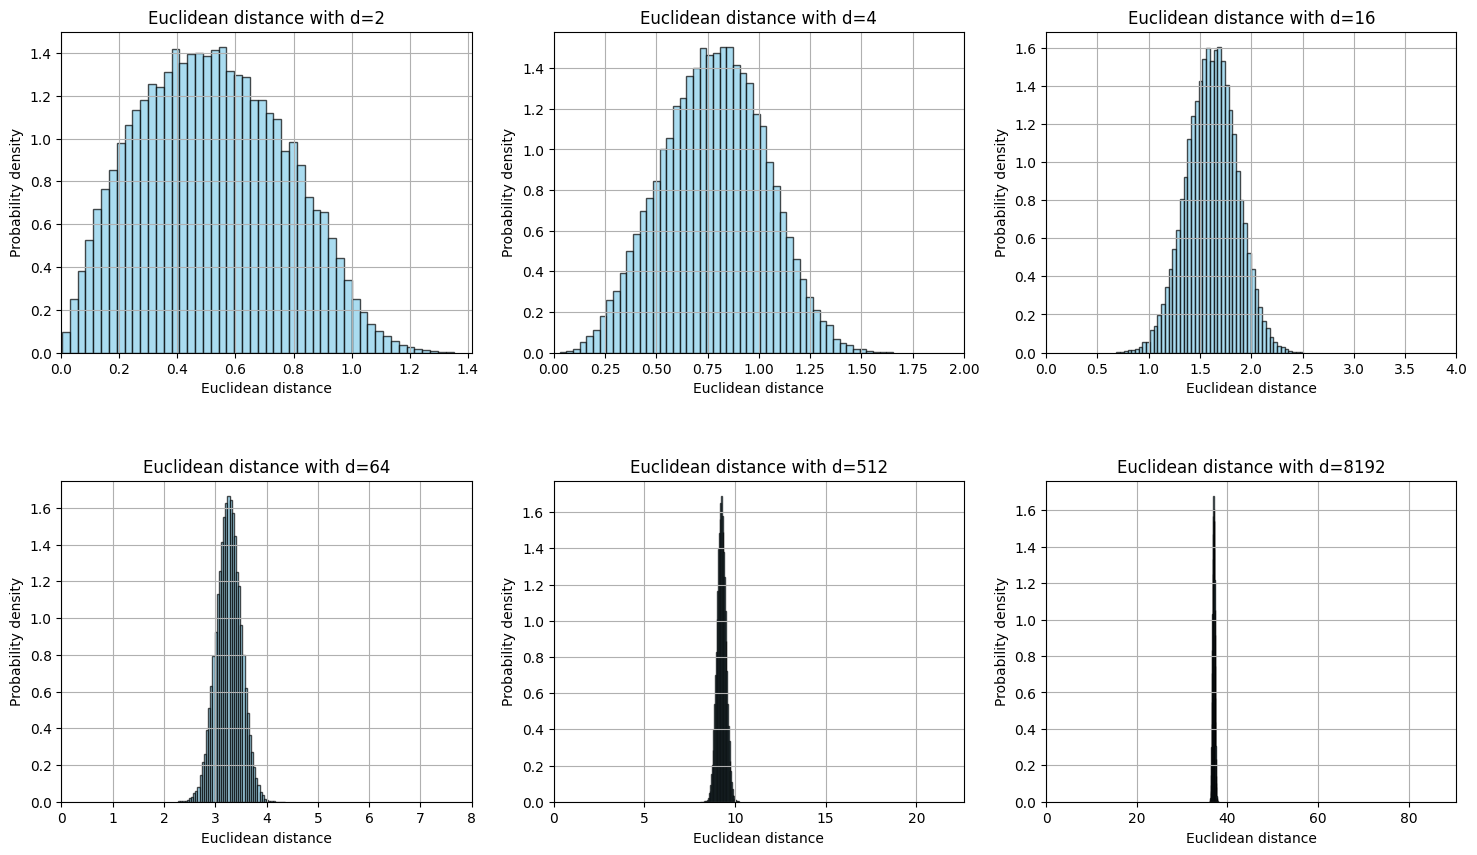

In [3]:
# Parameters
dimensions = [2, 4, 16, 64, 512, 8192]  # List of dimensions
n_sample = 50000                  # Number of Monte Carlo samples
NORMALIZE = False                 # normalizes vectors and map them to a unit hypersphere

# Function to generate a random normalized vector
def random_normalized_vector(d):
    if NORMALIZE:
        vec = np.random.uniform(0,1,d)
        vec /= np.linalg.norm(vec)
    else:
        vec = np.random.uniform(0,1,d)
    return vec

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to index subplots easily

for i, d in enumerate(dimensions):
    # Monte Carlo simulation of Euclidean distances
    distances = []
    for _ in range(n_sample):
        v1 = random_normalized_vector(d)
        v2 = random_normalized_vector(d)
        distances.append(np.linalg.norm(v1 - v2))  # Euclidean distance
    distances = np.array(distances)

    # Plot histogram
    axes[i].hist(distances, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Euclidean distance with d={d}')
    axes[i].set_xlabel('Euclidean distance')
    axes[i].set_ylabel('Probability density')
    axes[i].set_xlim(0, 2 if NORMALIZE else math.sqrt(d))  # x-axis from 0 to max distance
    axes[i].grid(True)

# Add extra vertical space between rows
plt.subplots_adjust(hspace=0.4)
plt.show()


In [8]:
np.mean(distances)+3*np.std(distances)

np.float64(37.67131892016052)

---